In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [24]:
#Import data
indices_data = Path('Datasets/INDICES_DATA.csv', low_memory=False)
covid_data = Path('Datasets/owid-covid-data.csv')

#Read in data
indices_data_df = pd.read_csv(indices_data)
covid_data_df = pd.read_csv(covid_data)

C:\Users\mrudu\AppData\Local\Temp\ipykernel_22024\4284616870.py:6: DtypeWarning: Columns (1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,36,37,38,39,40,41,43,44,45,46,47,48,50,51,52,53,54,55,57,58,59,60,61,62,64,65,66,67,68,69,71,72,73,74,75,76,78,79,80,81,82,83,85,86,87,88,89,90,92,93,94,95,96,97,99,100,101,102,103,104,106,107,108,109,110,111,113,114,115,116,117,118,120,121,122,123,124,125,127,128,129,130,131,132,134,135,136,137,138,139,141,142,143,144,145,146,148,149,150,151,152,153,155,156,157,158,159,160,162,163,164,165,166,167,169,170,171,172,173,174,176,177,178,179,180,181,183,184,185,186,187,188,190,191,192,193,194,195,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  indices_data_df = pd.read_csv(indices_data)


In [25]:
indices_data_df.head()

,Unnamed: 0,^GSPC,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,^IXIC,Unnamed: 9,...,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,^JN0U.JO,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230
0,Date,High,Low,Open,Close,Volume,Adj Close,NaN,High,Low,...,Close,Volume,Adj Close,NaN,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902,NaN,1291.880005,1285.449951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098,NaN,1293.630005,1272.339966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293,NaN,1310.839966,1280.699951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244,NaN,1321.469971,1310.630005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
covid_data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [27]:
#Make the first row of the indices dataframe the headers
new_header = indices_data_df.iloc[0]
indices_data_df = indices_data_df[1:]
indices_data_df.columns = new_header

indices_data_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,NaN,High,Low,...,Close,Volume,Adj Close,NaN,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902,NaN,1291.880005,1285.449951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098,NaN,1293.630005,1272.339966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293,NaN,1310.839966,1280.699951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244,NaN,1321.469971,1310.630005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1/7/1997,753.2600098,742.1799927,747.6500244,753.2299805,538220000,753.2299805,NaN,1327.819946,1312.079956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#USA- S&P 500 dataset creation
snp_df = indices_data_df.iloc[:, :7]
snp_df.head(30)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902
2,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098
3,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293
4,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244
5,1/7/1997,753.2600098,742.1799927,747.6500244,753.2299805,538220000,753.2299805
6,1/8/1997,755.7199707,747.710022,753.2299805,748.4099731,557510000,748.4099731
7,1/9/1997,757.6799927,748.4099731,748.4099731,754.8499756,555370000,754.8499756
8,1/10/1997,759.6500244,746.9199829,754.8499756,759.5,545850000,759.5
9,1/13/1997,762.8499756,756.6900024,759.5,759.5100098,445400000,759.5100098
10,1/14/1997,772.039978,759.5100098,759.5100098,768.8599854,531600000,768.8599854


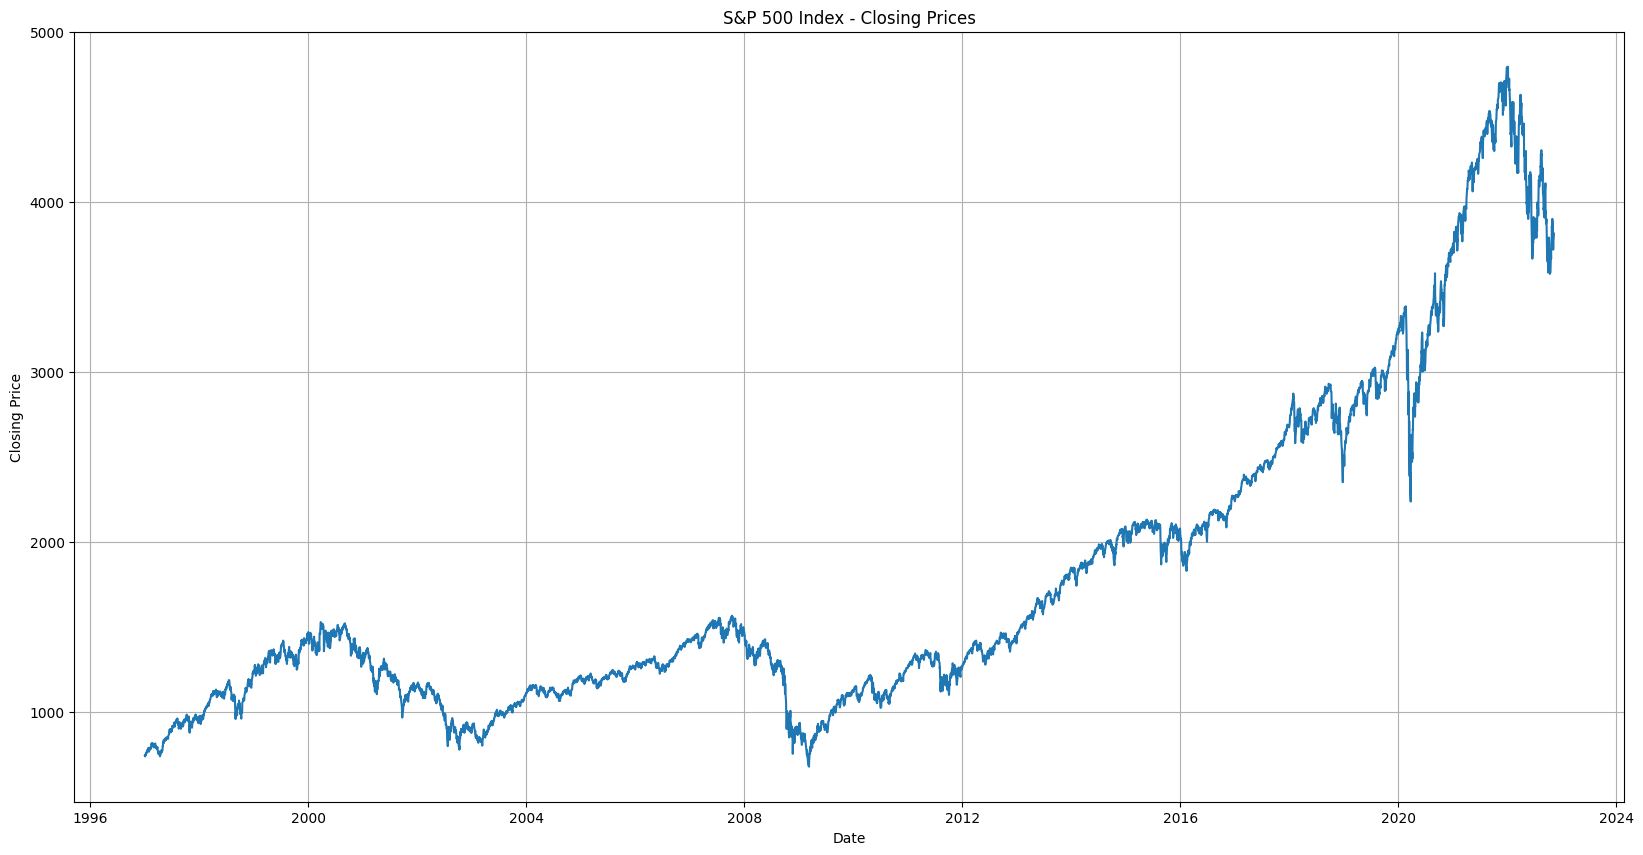

In [29]:
snp_df['Date'] = pd.to_datetime(snp_df['Date'])
snp_df['Close'] = snp_df['Close'].astype(float)
plt.figure(figsize=(20,10))
x = snp_df['Date']
y = snp_df['Close']
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Index - Closing Prices')
plt.grid(True)
plt.show()

In [30]:
# clean the covid dataframe
covid_data_df = covid_data_df[["location", "date", "total_cases", "total_deaths", "population"]]
covid_data_df = covid_data_df.sort_values(by='total_cases', ascending=False)
covid_data_df.head(10)

,location,date,total_cases,total_deaths,population
345826,World,2023-10-17,771407061.0,6972139.0,7.975105e+09
345824,World,2023-10-15,771407061.0,6972139.0,7.975105e+09
345827,World,2023-10-18,771407061.0,6972139.0,7.975105e+09
345825,World,2023-10-16,771407061.0,6972139.0,7.975105e+09
345823,World,2023-10-14,771405394.0,6972084.0,7.975105e+09
345822,World,2023-10-13,771404217.0,6972080.0,7.975105e+09
345821,World,2023-10-12,771401265.0,6972045.0,7.975105e+09
345820,World,2023-10-11,771391354.0,6972019.0,7.975105e+09
345819,World,2023-10-10,771378834.0,6971988.0,7.975105e+09
345818,World,2023-10-09,771351375.0,6971877.0,7.975105e+09


In [31]:
# groupby total cases by country
total_cases_by_country = covid_data_df.groupby('location')['total_cases'].max().sort_values(ascending=False)
top_10_countries = total_cases_by_country.head(10).reset_index()
top_10_countries.head(30)

,location,total_cases
0,World,771407061.0
1,High income,425988398.0
2,Asia,300681974.0
3,Europe,249783754.0
4,Upper middle income,244463792.0
5,European Union,184210531.0
6,North America,124492151.0
7,United States,103436829.0
8,China,99315684.0
9,Lower middle income,97458491.0


In [32]:
# count the amount of entries for each country
countries = covid_data_df['location'].value_counts(dropna=False)
print(countries)


location
Argentina          1387
Mexico             1387
Sweden             1386
Czechia            1386
Netherlands        1386
                   ... 
England            1303
Wales              1198
Macao               795
Northern Cyprus     691
Western Sahara        1
Name: count, Length: 255, dtype: int64


In [33]:
# single out location and population
location_population = covid_data_df[['location', 'population']]
location_population

,location,population
345826,World,7.975105e+09
345824,World,7.975105e+09
345827,World,7.975105e+09
345825,World,7.975105e+09
345823,World,7.975105e+09
...,...,...
348671,Zimbabwe,1.632054e+07
348672,Zimbabwe,1.632054e+07
348673,Zimbabwe,1.632054e+07
348674,Zimbabwe,1.632054e+07


In [34]:
# groupby location and population
location_population_max = location_population.groupby('location').max()
location_population_max

,population
location,
Afghanistan,4.112877e+07
Africa,1.426737e+09
Albania,2.842318e+06
Algeria,4.490323e+07
American Samoa,4.429500e+04
...,...
Western Sahara,5.760050e+05
World,7.975105e+09
Yemen,3.369661e+07


In [35]:
# sort population
location_population_max = location_population_max.sort_values('population', ascending=False)
location_population_max

,population
location,
World,7.975105e+09
Asia,4.721383e+09
Lower middle income,3.432097e+09
Upper middle income,2.525921e+09
Africa,1.426737e+09
...,...
Falkland Islands,3.801000e+03
Niue,1.952000e+03
Tokelau,1.893000e+03


In [36]:
# drop unneeded columns
location_population_max = location_population_max.drop('Lower middle income')
location_population_max = location_population_max.drop('Upper middle income')
location_population_max = location_population_max.drop('World')
location_population_max = location_population_max.drop('Asia')
location_population_max = location_population_max.drop('Africa')
location_population_max = location_population_max.drop('High income')
location_population_max = location_population_max.drop('Low income')
location_population_max = location_population_max.drop('European Union')
location_population_max = location_population_max.drop('North America')
location_population_max.head(30)

,population
location,
China,1.425887e+09
India,1.417173e+09
Europe,7.448078e+08
South America,4.368167e+08
United States,3.382899e+08
Indonesia,2.755013e+08
Pakistan,2.358249e+08
Nigeria,2.185412e+08
Brazil,2.153135e+08


In [37]:
# drop unneeded rows and group by location, total cases, date
total_cases = covid_data_df[['location', 'total_cases', 'date']]
total_cases_max = total_cases.groupby('location').max()
total_cases_max = total_cases_max.sort_values('total_cases', ascending=False)
total_cases_max = total_cases_max.drop('Lower middle income',)
total_cases_max = total_cases_max.drop('Upper middle income')
total_cases_max = total_cases_max.drop('World')
total_cases_max = total_cases_max.drop('Asia')
total_cases_max = total_cases_max.drop('Africa')
total_cases_max = total_cases_max.drop('High income')
total_cases_max = total_cases_max.drop('Low income')
total_cases_max = total_cases_max.drop('European Union')
total_cases_max = total_cases_max.drop('North America')
total_cases_max = total_cases_max.drop('Europe')
total_cases_max = total_cases_max.drop('South America')
total_cases_max.head()

,total_cases,date
location,,
United States,103436829.0,2023-10-18
China,99315684.0,2023-10-18
India,44999588.0,2023-10-18
France,38997490.0,2023-10-18
Germany,38437756.0,2023-10-18


In [38]:
# convert date to datetime
total_cases_max['date'] = pd.to_datetime(total_cases_max['date'])
print(total_cases_max.dtypes)
total_cases_max.head()

total_cases           float64
date           datetime64[ns]
dtype: object


,total_cases,date
location,,
United States,103436829.0,2023-10-18
China,99315684.0,2023-10-18
India,44999588.0,2023-10-18
France,38997490.0,2023-10-18
Germany,38437756.0,2023-10-18


In [39]:
# index by date
total_cases_max = total_cases_max.reset_index()
date_total_cases = total_cases_max.set_index('date')
date_total_cases.head(10)

,location,total_cases
date,,
2023-10-18,United States,103436829.0
2023-10-18,China,99315684.0
2023-10-18,India,44999588.0
2023-10-18,France,38997490.0
2023-10-18,Germany,38437756.0
2023-10-18,Brazil,37721749.0
2023-10-18,South Korea,34571873.0
2023-10-18,Japan,33803572.0
2023-10-18,Italy,26168412.0


In [40]:
#China - SSE Composite Index dataset as a subset of the indices dataframe 
sse_df = indices_data_df.iloc[:, [0] + list(range(113,119))]
sse_df.head(130)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,NaN,NaN,NaN,NaN,NaN,NaN
3,1/3/1997,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1997,NaN,NaN,NaN,NaN,NaN,NaN
5,1/7/1997,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
126,6/30/1997,NaN,NaN,NaN,NaN,NaN,NaN
127,7/1/1997,NaN,NaN,NaN,NaN,NaN,NaN
128,7/2/1997,1261.571045,1147.331055,1255.909058,1199.061035,0,1199.061035
129,7/3/1997,1194.676025,1149.939941,1194.676025,1150.623047,0,1150.623047


In [41]:
#India - S&P BSE SENSEX dataset as a subset of the indices dataframe 
bse_df = indices_data_df.iloc[:, [0] + list(range(141,147))]
bse_df.head(130)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,NaN,NaN,NaN,NaN,NaN,NaN
3,1/3/1997,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1997,NaN,NaN,NaN,NaN,NaN,NaN
5,1/7/1997,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
126,6/30/1997,NaN,NaN,NaN,NaN,NaN,NaN
127,7/1/1997,4301.77002,4247.660156,4263.109863,4300.859863,0,4300.859863
128,7/2/1997,4395.310059,4295.399902,4302.959961,4333.899902,0,4333.899902
129,7/3/1997,4393.290039,4299.970215,4335.790039,4323.459961,0,4323.459961


In [42]:
#France - CAC 40 dataset as a subset of the indices dataframe 
cac_df = indices_data_df.iloc[:, [0] + list(range(64,70))]
cac_df.head(130)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,2328.199951,2302.100098,2323.899902,2315.699951,0,2315.699951
2,1/2/1997,2305.899902,2251.5,2305.899902,2257,0,2257
3,1/3/1997,2285.5,2259.5,2265.600098,2282.800049,0,2282.800049
4,1/6/1997,2309.899902,2294.800049,2309.899902,2306.699951,0,2306.699951
5,1/7/1997,2315.300049,2294,2301.399902,2301.699951,0,2301.699951
...,...,...,...,...,...,...,...
126,6/30/1997,2896.699951,2858.300049,2884.5,2858.300049,0,2858.300049
127,7/1/1997,2944,2866,2866.100098,2944,0,2944
128,7/2/1997,2986.100098,2879.600098,2947.600098,2909.5,0,2909.5
129,7/3/1997,2949.699951,2908.399902,2926.5,2937,0,2937


In [43]:
#Germany - DAX Performance-Index dataset as a subset of the indices dataframe 
dax_df = indices_data_df.iloc[:, [0] + list(range(57,63))]
dax_df.head(130)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,2850.939941,2815.5,2836.820068,2820.810059,0,2820.810059
3,1/3/1997,2863.280029,2833.610107,2836.620117,2863.26001,0,2863.26001
4,1/6/1997,2904.47998,2877.350098,2884.060059,2890.199951,0,2890.199951
5,1/7/1997,2885.219971,2869.060059,2883.129883,2876.340088,0,2876.340088
...,...,...,...,...,...,...,...
126,6/30/1997,3826.139893,3756.649902,3815.27002,3766.889893,0,3766.889893
127,7/1/1997,3835.840088,3782.590088,3782.709961,3834.840088,0,3834.840088
128,7/2/1997,3870.810059,3837.040039,3840.320068,3867.530029,0,3867.530029
129,7/3/1997,3944.340088,3870.570068,3882.47998,3939.72998,0,3939.72998


C:\Users\mrudu\AppData\Local\Temp\ipykernel_22024\1734681967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sse_df['Date'] = pd.to_datetime(sse_df['Date'])
C:\Users\mrudu\AppData\Local\Temp\ipykernel_22024\1734681967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bse_df['Date'] = pd.to_datetime(bse_df['Date'])
C:\Users\mrudu\AppData\Local\Temp\ipykernel_22024\1734681967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

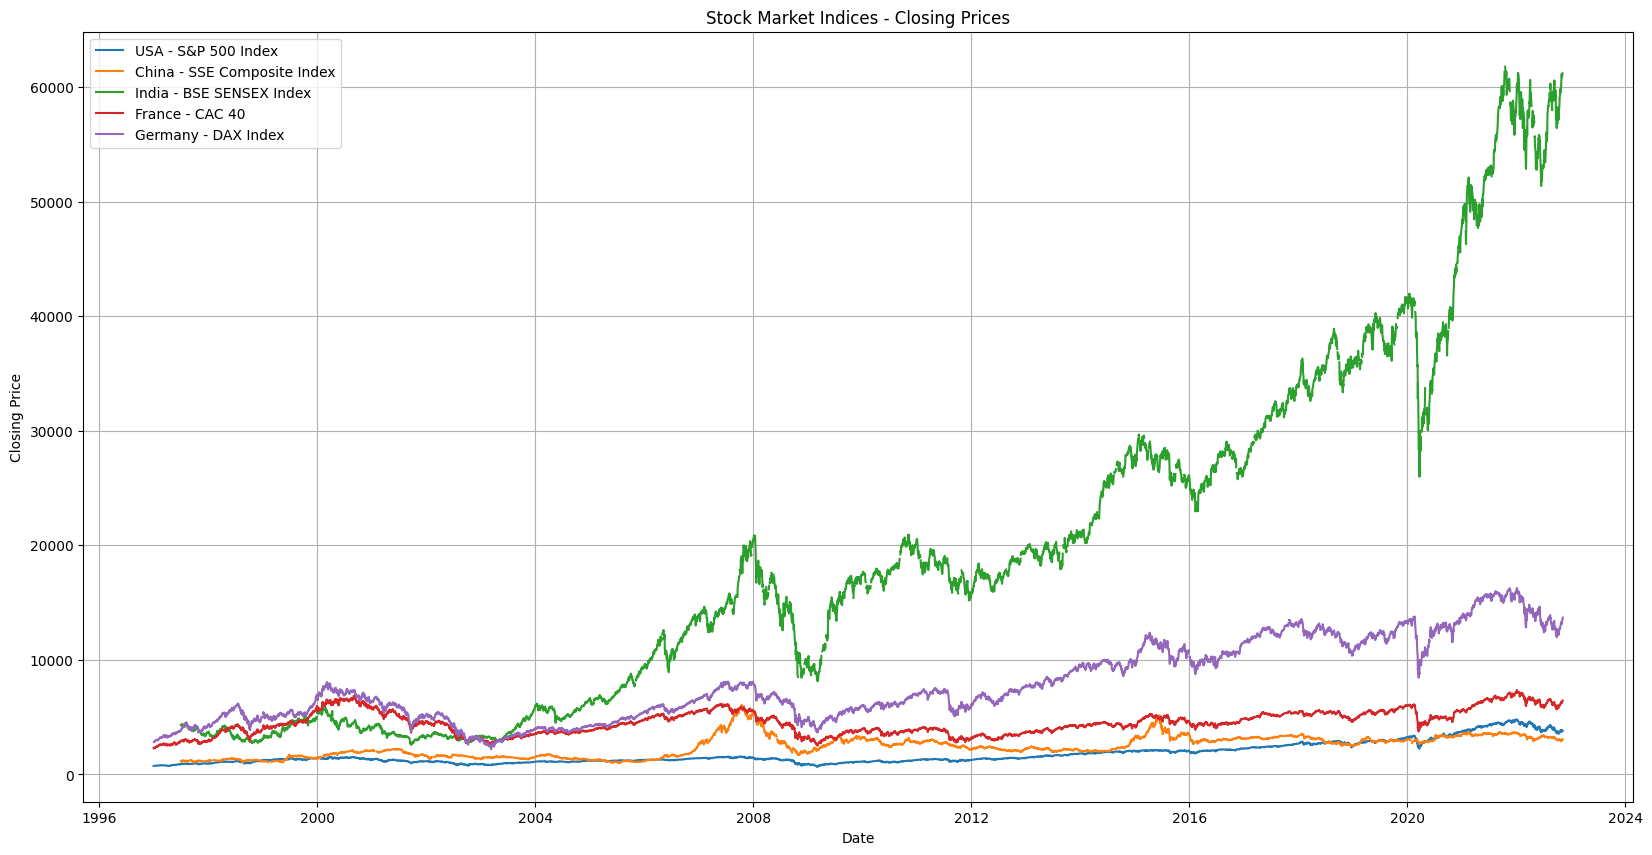

In [46]:
#Convert Date columns to datetime
snp_df['Date'] = pd.to_datetime(snp_df['Date'])
sse_df['Date'] = pd.to_datetime(sse_df['Date'])
bse_df['Date'] = pd.to_datetime(bse_df['Date'])
cac_df['Date'] = pd.to_datetime(cac_df['Date'])
dax_df['Date'] = pd.to_datetime(dax_df['Date'])

#Convert Close data to a float datatype
snp_df['Close'] = snp_df['Close'].astype(float)
sse_df['Close'] = sse_df['Close'].astype(float)
bse_df['Close'] = bse_df['Close'].astype(float)
cac_df['Close'] = cac_df['Close'].astype(float)
dax_df['Close'] = dax_df['Close'].astype(float)

#Plot the graph
plt.figure(figsize=(20,10))

#Plot the index dataframes
plt.plot(snp_df['Date'], snp_df['Close'], label='USA - S&P 500 Index')
plt.plot(sse_df['Date'], sse_df['Close'], label='China - SSE Composite Index')
plt.plot(bse_df['Date'], bse_df['Close'], label='India - BSE SENSEX Index')
plt.plot(cac_df['Date'], cac_df['Close'], label='France - CAC 40')
plt.plot(dax_df['Date'], dax_df['Close'], label='Germany - DAX Index')

#Create the graph details
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Market Indices - Closing Prices')
plt.grid(True)
plt.legend()
plt.show()